In [2]:
import sys
import random
import numpy as np
import timeit
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

def generate_dense_graph(num_vertices, max_weight=10):
    graph = [[0] * num_vertices for _ in range(num_vertices)]
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            weight = random.randint(1, max_weight)
            graph[i][j] = weight
            graph[j][i] = weight
    return graph

def min_key(vertices, key, mst_set):
    min_value = sys.maxsize
    min_index = None

    for v in range(vertices):
        if key[v] < min_value and not mst_set[v]:
            min_value = key[v]
            min_index = v

    return min_index

def find(parent, i):
    if parent[i] == i:
        return i
    return find(parent, parent[i])

def union(parent, rank, x, y):
    xroot = find(parent, x)
    yroot = find(parent, y)

    if rank[xroot] < rank[yroot]:
        parent[xroot] = yroot
    elif rank[xroot] > rank[yroot]:
        parent[yroot] = xroot
    else:
        parent[yroot] = xroot
        rank[xroot] += 1

In [ ]:
def sparse_adjacency_matrix(num_nodes, num_edges, weight_range=(1, 10)):
    # Create an empty adjacency matrix
    adjacency_matrix = np.zeros((num_nodes, num_nodes))

    # Generate random edges with weights
    edges = set()
    while len(edges) < num_edges:
        node1 = np.random.randint(0, num_nodes)
        node2 = np.random.randint(0, num_nodes)
        weight = np.random.randint(weight_range[0], weight_range[1] + 1)
        if node1 != node2 and (node1, node2) not in edges and (node2, node1) not in edges:
            edges.add((node1, node2))
            adjacency_matrix[node1][node2] = weight
            adjacency_matrix[node2][node1] = weight  # Assuming an undirected graph

    return adjacency_matrix

In [ ]:
def generate_weighted_dense_graph(n_nodes):
    dense_graph = nx.Graph()

    # Add nodes to the graph
    dense_graph.add_nodes_from(range(n_nodes))

    # Add edges to the graph with random weights
    for i in range(n_nodes):
        for j in range(i+1, n_nodes):
            dense_graph.add_edge(i, j, weight=random.randint(1, 10))

    return dense_graph

In [ ]:
def generate_weighted_sparse_graph(num_nodes, num_edges, weight_range=(1, 10)):
    # Create an empty graph
    G = nx.Graph()

    # Add nodes
    G.add_nodes_from(range(num_nodes))

    # Add edges randomly with weights
    edge_count = 0
    while edge_count < num_edges:
        node1 = random.randint(0, num_nodes - 1)
        node2 = random.randint(0, num_nodes - 1)
        weight = random.randint(weight_range[0], weight_range[1])
        if node1 != node2 and not G.has_edge(node1, node2):
            G.add_edge(node1, node2, weight=weight)
            edge_count += 1

    return G

In [ ]:
def kruskal(adj_matrix):
    num_vertices = len(adj_matrix)
    result = []

    # Sort all the edges in non-decreasing order of their weight
    edges = []
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            if adj_matrix[i][j] != 0:
                edges.append((i, j, adj_matrix[i][j]))
    edges = sorted(edges, key=lambda x: x[2])

    parent = [i for i in range(num_vertices)]
    rank = [0] * num_vertices

    i = 0
    e = 0
    while e < num_vertices - 1 and i < len(edges):
        u, v, weight = edges[i]
        i += 1
        x = find(parent, u)
        y = find(parent, v)

        if x != y:
            e += 1
            result.append((u, v, weight))
            union(parent, rank, x, y)

    return result


In [ ]:
def kruskal_mst(graph):
    minimum_spanning_tree = []
    parent = {}
    rank = {}

    for vertex in list(graph.nodes()):
        parent[vertex] = vertex
        rank[vertex] = 0

    sorted_edges = sorted(list(graph.edges(data = True)), key=lambda edge: edge[2]['weight'])

    for edge in sorted_edges:
        src, dest, weight = edge
        src_root = find(parent, src)
        dest_root = find(parent, dest)

        if src_root != dest_root:
            minimum_spanning_tree.append(edge)
            union(parent, rank, src, dest)

    return minimum_spanning_tree

In [ ]:
start = timeit.default_timer()
num_vertices = 15
dense_graph = generate_dense_graph(num_vertices)
print("Dense Graph (Adjacency Matrix):")
print(dense_graph)

    # Compute MST using Kruskal's algorithm
mst = kruskal(dense_graph)
print("\nMinimum Spanning Tree (MST):")
print("Edge \t Weight")
for edge in mst:
      print(f"{edge[0]} - {edge[1]} \t {edge[2]}")
stop = timeit.default_timer()
print('Time: ', stop - start)

Dense Graph (Adjacency Matrix):
[[0, 9, 10, 8, 2, 4, 3, 4, 3, 1, 6, 10, 9, 4, 8], [9, 0, 10, 5, 5, 4, 8, 6, 10, 9, 9, 8, 10, 9, 4], [10, 10, 0, 5, 8, 6, 9, 3, 7, 2, 3, 10, 10, 3, 9], [8, 5, 5, 0, 8, 9, 6, 5, 1, 4, 3, 2, 3, 10, 4], [2, 5, 8, 8, 0, 10, 3, 10, 3, 10, 3, 10, 4, 4, 1], [4, 4, 6, 9, 10, 0, 10, 7, 6, 3, 3, 8, 6, 6, 5], [3, 8, 9, 6, 3, 10, 0, 7, 2, 8, 4, 5, 2, 5, 6], [4, 6, 3, 5, 10, 7, 7, 0, 2, 1, 4, 6, 7, 1, 2], [3, 10, 7, 1, 3, 6, 2, 2, 0, 4, 4, 4, 3, 8, 10], [1, 9, 2, 4, 10, 3, 8, 1, 4, 0, 2, 3, 10, 8, 2], [6, 9, 3, 3, 3, 3, 4, 4, 4, 2, 0, 5, 1, 8, 3], [10, 8, 10, 2, 10, 8, 5, 6, 4, 3, 5, 0, 2, 1, 7], [9, 10, 10, 3, 4, 6, 2, 7, 3, 10, 1, 2, 0, 8, 2], [4, 9, 3, 10, 4, 6, 5, 1, 8, 8, 8, 1, 8, 0, 4], [8, 4, 9, 4, 1, 5, 6, 2, 10, 2, 3, 7, 2, 4, 0]]

Minimum Spanning Tree (MST):
Edge 	 Weight
0 - 9 	 1
3 - 8 	 1
4 - 14 	 1
7 - 9 	 1
7 - 13 	 1
10 - 12 	 1
11 - 13 	 1
0 - 4 	 2
2 - 9 	 2
3 - 11 	 2
6 - 8 	 2
6 - 12 	 2
5 - 9 	 3
1 - 5 	 4
Time:  0.0066827360001298075


In [ ]:
# Time - complexity on dense graph as graph
avg_case = []
best_case = []
worst_case = []
index = []
vertice = 50
for i in range (5, vertice):
    num = 50
    time_vertice = []
    for j in range(1, num):
      start = timeit.default_timer()
      num_nodes = i
      num_edges = num_nodes + 5
      dense_graph_vertice = generate_weighted_sparse_graph(num_nodes, num_edges, weight_range=(1, 10))
      mst_case = kruskal_mst(dense_graph_vertice)
      stop = timeit.default_timer()
      expe_time = stop - start
      time_vertice.append(expe_time)
    avg_case.append(sum(time_vertice)/len(time_vertice))
    best_case.append(min(time_vertice))
    worst_case.append(max(time_vertice))
    index.append(i)
print(avg_case)
print(best_case)
print(worst_case)

[0.0003392516530914932, 0.00014659644896209084, 0.00012889893879237577, 0.0001320097754726202, 0.00013182210208544014, 0.00014254777550711285, 0.00015580479593692724, 0.0001563582653089929, 0.00016133989801142443, 0.000178831979647672, 0.00017465259177660468, 0.00019361720412735867, 0.0001915642448638005, 0.0001990075306078937, 0.0002193282449316401, 0.00021287191832795673, 0.0002240432040893285, 0.0002270160612077197, 0.00023630289794654142, 0.00025626936729502035, 0.00026376906120907623, 0.0002662482653082704, 0.00028928228575565224, 0.00027952595919301454, 0.00028699561226505686, 0.00028668075512950037, 0.00034983785718043, 0.0003598402245188481, 0.0003389651020017704, 0.0003335281836760779, 0.00035084171425909036, 0.00034580091833235276, 0.00035326426529295253, 0.0003707327143033302, 0.00036059248976721855, 0.00037155973470770715, 0.00038922971428718837, 0.00041648938772874427, 0.00043286622443776315, 0.0004061022653109014, 0.0006856634694189296, 0.0004276198979471014, 0.0005175885

In [ ]:
df = pd.DataFrame({'index': index,'avg_case': avg_case, 'best_case': best_case, 'worst_case': worst_case})
df.head()

,index,avg_case,best_case,worst_case
0,5,0.000339,0.000118,0.003915
1,6,0.000147,0.000092,0.000637
2,7,0.000129,0.000100,0.000440
3,8,0.000132,0.000108,0.000221
4,9,0.000132,0.000113,0.000208


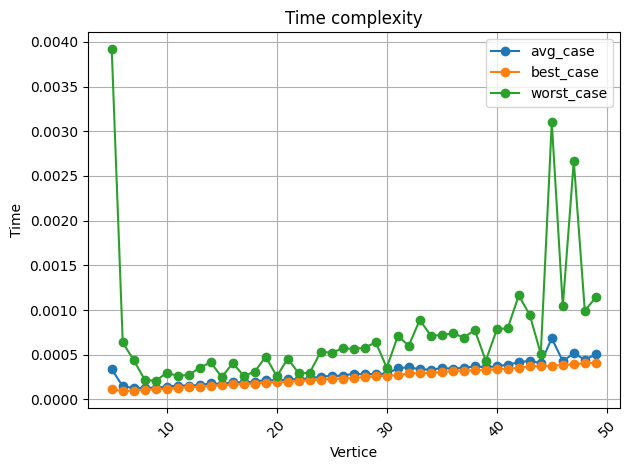

In [ ]:
plt.plot(df['index'], df['avg_case'], marker='o', linestyle='-', label='avg_case')
plt.plot(df['index'], df['best_case'], marker='o', linestyle='-', label='best_case')
plt.plot(df['index'], df['worst_case'], marker='o', linestyle='-', label='worst_case')

plt.title('Time complexity')
plt.xlabel('Vertice')
plt.ylabel('Time')
plt.legend()  # Add legend
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()